## Eksik Veri Nedir ?

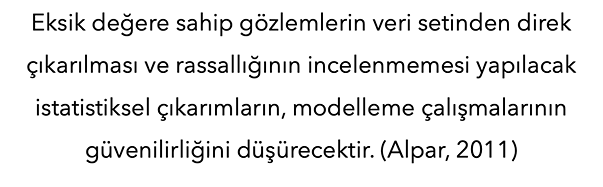

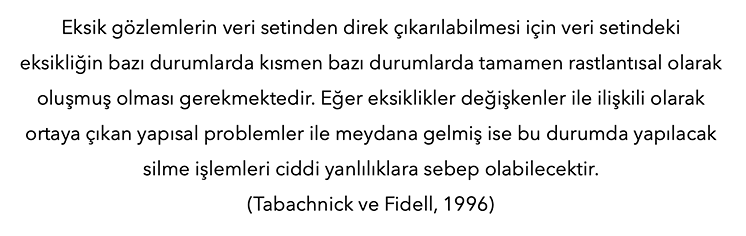

1.veri setindeki eksikligin yapısal bir eksiklik olup olmadıgının bilinmesi gerekir?

2.NA herzaman eksiklik anlamına gelmez!

3.Bilgi Kaybı!

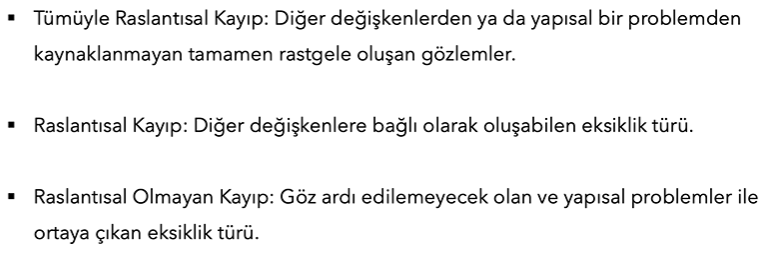

eksik gözlem sorununu çözme yöntemleri

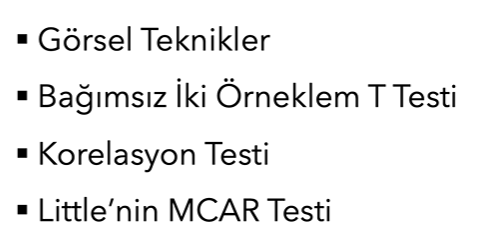

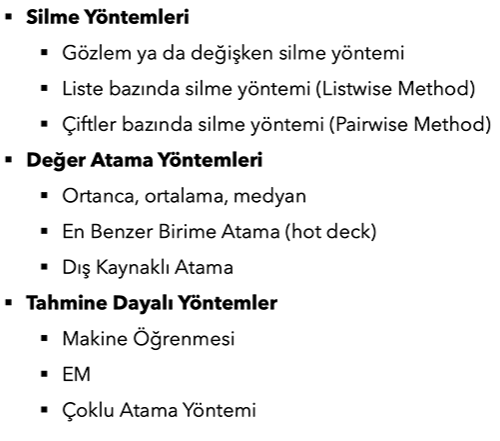

### Eksik Veri Hızlı Çözümü

In [23]:
import numpy as np
import pandas as pd
V1=np.array([1,3,6,np.NAN,7,1,np.NAN,9,15])
V2=np.array([7,np.NAN,5,8,12,np.NAN,np.NAN,2,3])
V3=np.array([np.NAN,12,5,6,14,7,np.NAN,2,31])
df=pd.DataFrame(
{
    "V1":V1,
    "V2":V2,
    "V3":V3 }
)
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [4]:
df.isnull().sum()#her bir veri grubundaki eksik veri sayısını bize verir

V1    2
V2    3
V3    2
dtype: int64

In [6]:
df.notnull().sum()#bu ise veri setlerindeki dolu olan degerlerini verir ,yani yukarıdakinin tersi 

V1    7
V2    6
V3    7
dtype: int64

In [7]:
df.isnull().sum().sum()#veri setlerindeki toplam eksik sayıyı verir bize

7

In [9]:
df.isnull()#degerlere bak eksiklik var mı sorusunu sorarız

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [11]:
df[df.isnull().any(axis=1)]#en az bir tane eksik gözlem varsa onları bana göster

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [12]:
df[df.notnull().all(axis=1)]#veri setindeki hepsinin dolu olanlarını karşımıza getireçek

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [14]:
df[df["V1"].notnull()&df["V2"].notnull()&df["V3"].notnull()]#bir üst satırdakinin başka şekilde yazımı

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [15]:
#eksik degerlerin direk silinmesi

In [18]:
df.dropna()#gzölem biriminde bir tane dahi eksiklik olsada silme yapan kod ,ama geçiçi'dir

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [21]:
df.dropna(inplace=True)#bir üst satırdaki silme işlemini kalıcı hale getirdi

In [20]:
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [24]:
#basit deger atama

In [25]:
df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [26]:
df["V1"].mean()#v1 in ortalaması

6.0

In [28]:
df["V1"].fillna(df["V1"].mean())#burada v1 de boş olan yerleri onun ortalaması ile doldurduk

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [29]:
df["V2"].fillna(0)#istedigimiz deger ile doldurmak istersek bu şekilde yazarız

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [33]:
df.apply(lambda x:x.fillna(x.mean()),axis=0)#apply ile sütünda işlem yapıcaz anlamına gelir,burada her boşlugu o degişkenin kendi ortalaması ile doldurma işlemi yaptık 

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Eksik Veri Yapısının Görselleştirilmesi

In [12]:
 # kütüphane indirdik
!pip install missingno 

In [13]:
import missingno as msno

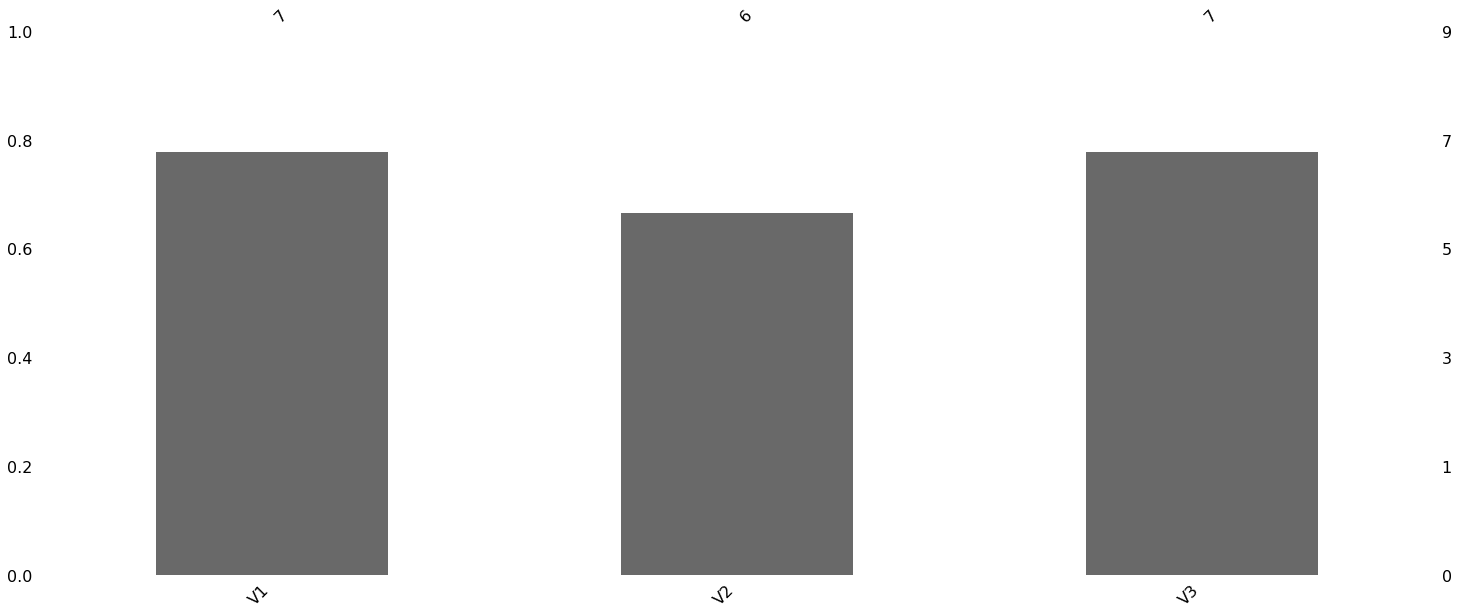

In [14]:
msno.bar(df);

degişkenlerdeki eksikligi oransal olarak görebiliyoruz

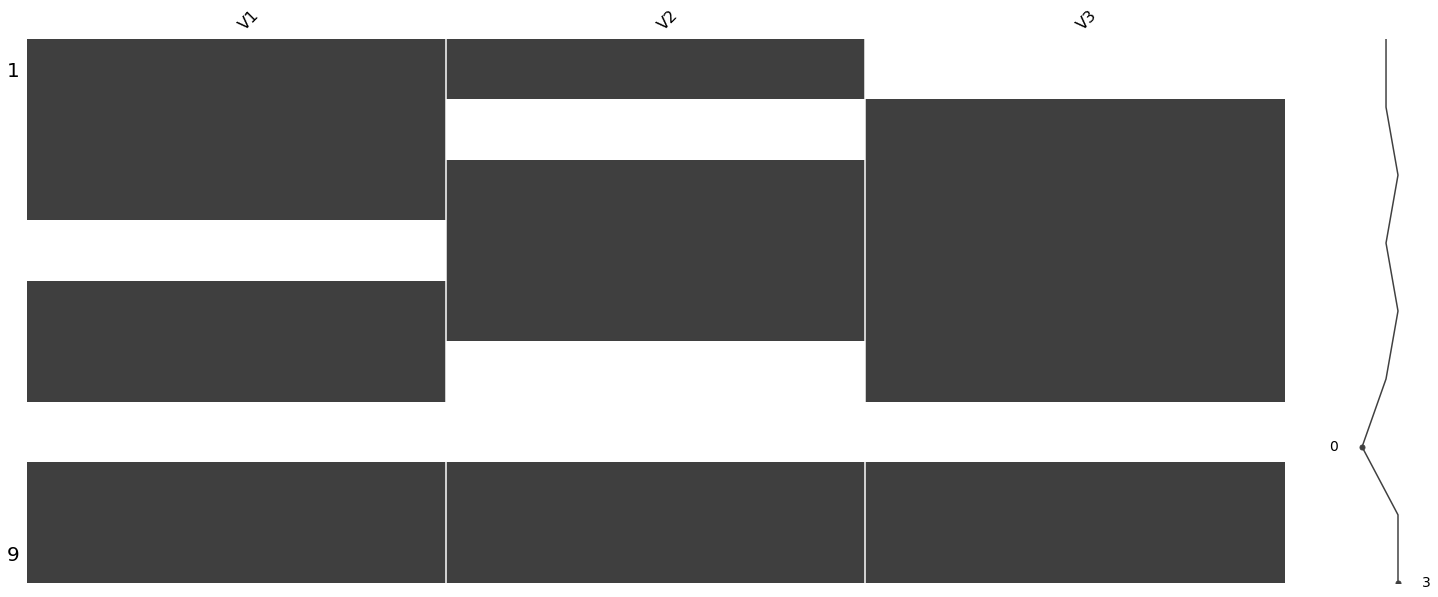

In [15]:
msno.matrix(df);#soldaki eksen gözlem birimlerini

bunun görsel hali

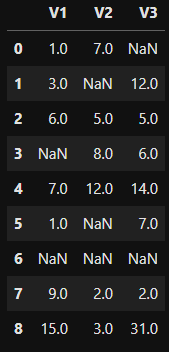

In [18]:
#başka bir veri setinde bakış yapıcaz
import seaborn as sns
df=sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [19]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

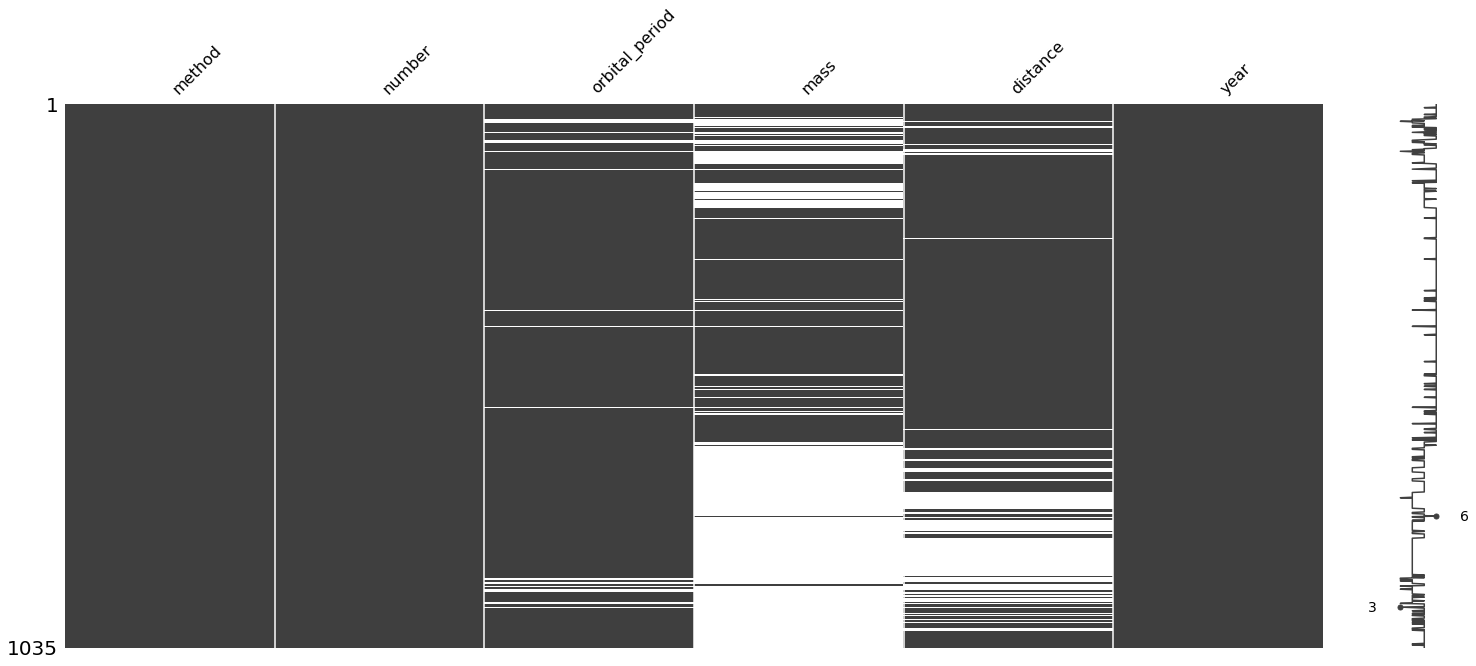

In [21]:
msno.matrix(df);

bu tabloda şunu gördük mesela orbital_period ile mass arasında bir ilişki var demek ,degişkenler arasında bir bagımlılık var demektir

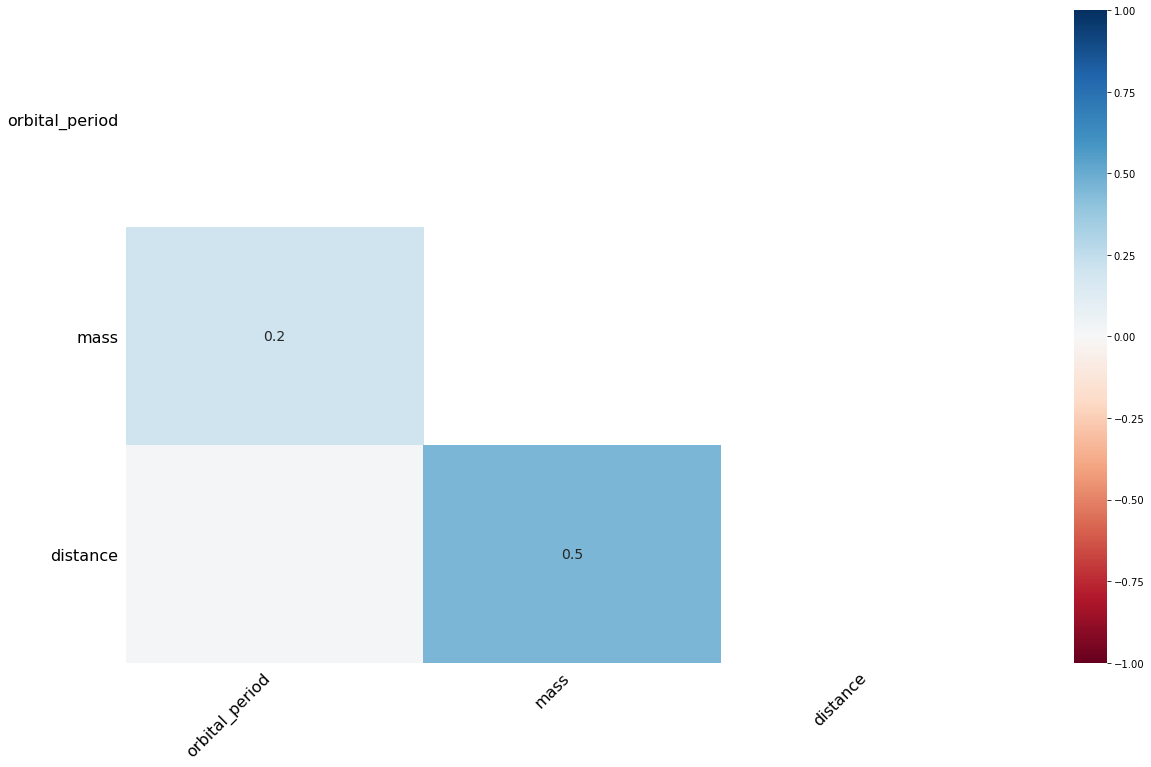

In [22]:
msno.heatmap(df);#-1 ile +1 arasındaki degerler de bir ilişki veririr

yorum=distance ile mass arasında 0.5 oranında bir ilişki var  demektir(%50 bir korelasyon var demektir)



## Silme Yöntemi

In [24]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [25]:
# en az bir tane eksik gözlem deger varsa bile silme yap
df.dropna()#kalıcı degil ama bu ,

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [26]:
#tüm gözlemlerin aynı anda NAN olması durumunda silme hepsini
#6.satırı siliyor
df.dropna(how="all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [27]:
#degişkenler bazında silme işlemi yapmak istersek 

In [28]:
df.dropna(axis=1)#hespinde en az bir tane oldugu için hepsini sildi

""
0
1
2
3
4
5
6
7
8


In [29]:
df.dropna(axis=1,how="all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [30]:
df["sil_beni"]=np.nan#dataya ekleme yaptık 

In [31]:
df

,V1,V2,V3,sil_beni
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [33]:
df.dropna(axis=1,how="all")#burada data da sütün bazında hepsi NAN olanı sildi

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [34]:
df

,V1,V2,V3,sil_beni
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [37]:
df.dropna(axis=1,how="all",inplace=True)#silbeni yi veri setinden kaldırdık burada

In [36]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Basit Deger Atama Yöntemleri

In [38]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [39]:
#sayısal degişkenlerde atama 

In [42]:
df["V1"].fillna(0)#boş olan yerlere 0 atadık ,kalıcı degil

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [43]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [47]:
df.apply(lambda x:x.fillna(x.mean()),axis=0)#bütün degişkenlerdeki eksik olan kısımlar kendi ortalamaları ile dolduruldu

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [50]:
#bir üst satırdakinin başka yöntemi,daha basit bir yöntem bu 
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [51]:
#bazılarına ortalama bazılarına medyan atama yapmak istersek (burada 1. 2. ortalama 3. medyana göre )

df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [52]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [53]:
#üçünçü yöntem ise
df.where(pd.notna(df),df.mean(),axis="columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Kategorik Degişken Kırılımında Deger Atama

In [55]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [56]:
#depertmanlarına göre ortalamlarına bakalım
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [58]:
 df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))#maaşlarda eksik olan degerleri doldurduk 

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

## Kategorik Degişkenler İçin Eksik Deger Atama

In [63]:

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])

V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"],dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
         
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [64]:
#en pratik yol mod işlemidir ,yani en sık gözlenen deger neyse onunla doldurma işlemi yaparız 

In [66]:
df["departman"].mode()[0]

'IK'

In [68]:
df["departman"].fillna(df["departman"].mode()[0])#kalıcı işlem degil ,inplace ile true da diyip kalıcı hale getirebiliriz

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [69]:
df["departman"].fillna(method="bfill")#önceki degerle doldurma işlemi 

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [71]:
df["departman"].fillna(method="ffill")#sonraki degerle doldurma yapmak istersek

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

# Tahmine Dayalı Deger Atama Yöntemleri

In [2]:
import seaborn as sns
import missingno as msno
df=sns.load_dataset('titanic')
df=df.select_dtypes(include=['float64','int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [3]:
!pip install ycimpute

In [4]:
from ycimpute.imputer import knnimput

In [9]:
var_names=list(df)#değişken adları tutulmuştur

In [8]:
import numpy as np
n_df=np.array(df)#df n_df adlı bir array’a dönüştürülmüştür
n_df[0:10]# ilk 10 gözleme bakılmıştır

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [12]:
n_df.shape

(891, 6)

In [15]:
dff=knnimput.KNN(k=4).complete(n_df)#eksik olan gözlemleri doldurma işlemi yaptı,tahmine dayalı atama işlemi yapılmıştır 

Imputing row 1/891 with 0 missing, elapsed time: 0.087
Imputing row 101/891 with 0 missing, elapsed time: 0.088
Imputing row 201/891 with 0 missing, elapsed time: 0.088
Imputing row 301/891 with 1 missing, elapsed time: 0.089
Imputing row 401/891 with 0 missing, elapsed time: 0.090
Imputing row 501/891 with 0 missing, elapsed time: 0.091
Imputing row 601/891 with 0 missing, elapsed time: 0.091
Imputing row 701/891 with 0 missing, elapsed time: 0.091
Imputing row 801/891 with 0 missing, elapsed time: 0.091


In [16]:
type(dff)

numpy.ndarray

In [18]:
import pandas as pd
dff=pd.DataFrame(dff,columns=var_names)#pandas dataframe ine dönüştürme işlemi yapmış olduk

In [19]:
type(dff)

pandas.core.frame.DataFrame

In [21]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [22]:
#random forests işlemi ise yukarıdaki doldurma işleminin bir başka versiyonu

In [35]:
import seaborn as sns
import missingno as msno
df=sns.load_dataset('titanic')
df=df.select_dtypes(include=['float64','int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [36]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [37]:
var_names=list(df)

In [38]:
import numpy as np
n_df=np.array(df)

In [39]:
from ycimpute.imputer import iterforest
dff= iterforest.IterImput().complete(n_df)

AttributeError: module 'ycimpute.imputer.iterforest' has no attribute 'IterImput'

In [40]:
dff=pd.DataFrame(dff,columns=var_names)

In [41]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [42]:
import seaborn as sns
import missingno as msno
df=sns.load_dataset('titanic')
df=df.select_dtypes(include=['float64','int64'])

In [43]:
#EM

In [45]:
from ycimpute.imputer import EM
var_names=list(df)

In [46]:
import numpy as np
n_df=np.array(df)

In [47]:
dff=EM().complete(n_df)

In [48]:
dff=pd.DataFrame(dff,columns=var_names)

In [49]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [50]:
#tahmine dayalı doldurma yaparken önce gözlem yapmayı unutma (yani yapısal problem var mı,rastgelelik var mı ,degişkenler birbirine baglı mı )